# Read in Data

In [ ]:
# Import libraries

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_url = "https://raw.githubusercontent.com/kianmessi/Mini-Project-2016/main/2016.csv"
df = pd.read_csv(dataset_url)

# High Level View

In [ ]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [ ]:
df.shape

(157, 13)

This dataset consists of a collection of 12 social and economic indicators that affect happiness across 157 different countries. These indicators include metrics for GDP per Capita, Family, Life Expectancy, Freedom, Government Trust, Generosity, and a Dystopia Residual. The Dystopia Residual is used to represent the unexplained components or variations in happiness that are not accounted for by the six other key variables mentioned. None of the columns have units, but they're each scored on different scales. Therefore, this dataset will be very useful for identifying correlations between different factors that impact the general happiness and well-being of a country's population.


# Preliminary Exploration

## 1. Data Summarization

In this section, we want to better understand how the data is distributed and what variables to focus on for our analysis.

1.   Describe: To see dataframe level statistics of every numerical field. We see that the counts are the same for all fields at 157, while the minimum and maximum Happiness Scores are 2.91 and 7.53, respectively. The mean of the Happiness Scores is 5.38.
2.   Histogram: To see the distribution of happiness scores. The distribution appears to be fairly symmetric and unimodal, therefore roughly representing a normal distribution.
3.   Info: To see what type of data is in each field. We see that it is a mix of 11 numerical and 2 object fields.



In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


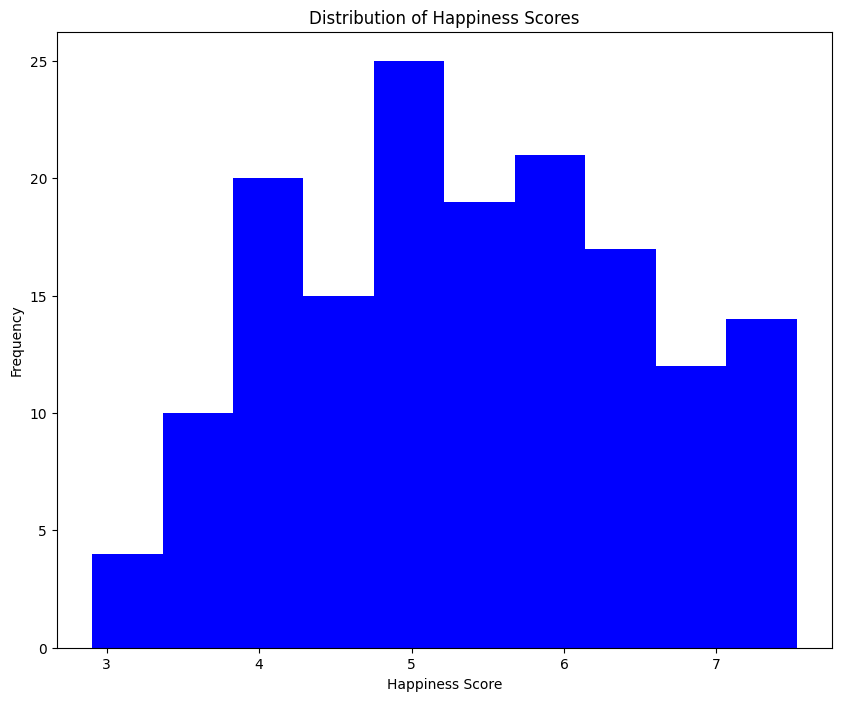

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df['Happiness Score'], bins = 10, color = 'blue')

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

## 2. Handling Missing Values

In this section, we check the dataset for any columns with null values as this helps in removing the noisy/unuseful data. We find that 0 fields have null values and so we don't have to remove any rows from the dataset.

In [ ]:
# Determine the number of missing values per feature
print("NAs for each feature:")
df.isna().sum()

NAs for each feature:


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
# Make sure that none of the features contain missing values
list(df.columns[df.isna().sum() == 0])

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

# Defining Objectives

The objectives for the data analysis tasks include -

  1.   We want to analyze how features like Economy (GDP per Capita), Family, and Health (Life Expectancy) are correlated in determing a country's Happiness Score. It will help to see how the 3 features are correlated to one another as well to help make logical predictions about the other features if we know the score for one of the features.
  2.   How does a country's trust in its government play a role in the perceived freedom afforded to its people?
  3.   How do Happiness Scores vary by geographical region? Can we associate certain regions with having happier populations?



# Present Your Findings

In [ ]:
# Filter dataframe to only include the desired variables
df_filtered = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Happiness Score']]

A correlation heatmap was chosen for Objective 1 because it presents a color gradient based on the strength of correlation between each of the 4 features. Darker colored grids represent stronger correlations and lighter colored grids represent weaker correlations. Corresponding numerical correlation values are also provided in each grid.

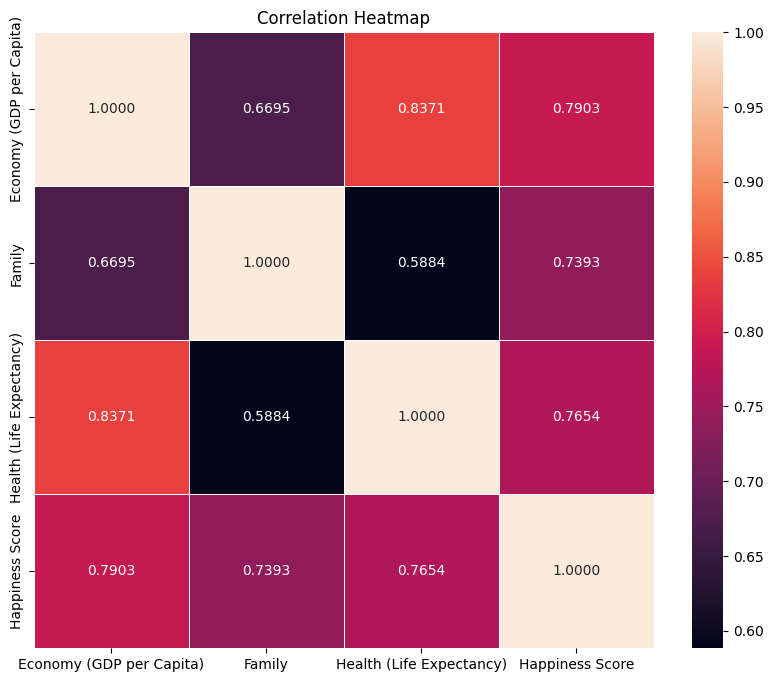

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')
sns.heatmap(df_filtered.corr(), annot=True, fmt=".4f",  linewidths=0.5)
plt.show()

From the heatmap above, we can infer that Health (Life Expectancy) and Economy (GDP per Capita) are the 2 features with the strongest positive relationship, with a correlation value of 0.8371. This makes logical sense that people in a wealthier country have better access to healthcare and nutrition, allowing them to live longer on average. I found it surprising that there was not a stronger positive relationship between Family and Health (Life Expectancy). I presumed that a country whose population feels like they have proper social support from their friends and family, will live a more joyful/mentally healthy life thus extending their lifetime. These 2 features had the weakest correlation among all the other combinations at just 0.5884. What interested me the most however, was the fact that Economy (GDP per Capita) had the strongest direct relationship with Happiness Score, proving that money can buy happiness to a certain extent.

In [ ]:
# Isolate freedom and trust columns
freedom = df['Freedom']
trust = df['Trust (Government Corruption)']

A scatterplot was used for Objective 2 as a different approach to represent the overall trend/correlation between Trust and Freedom across all countries. Based on the direction and slope of the imaginary trendline, we can determine the type (positive or negative) and strength of the relationship between the 2 features, respectively.

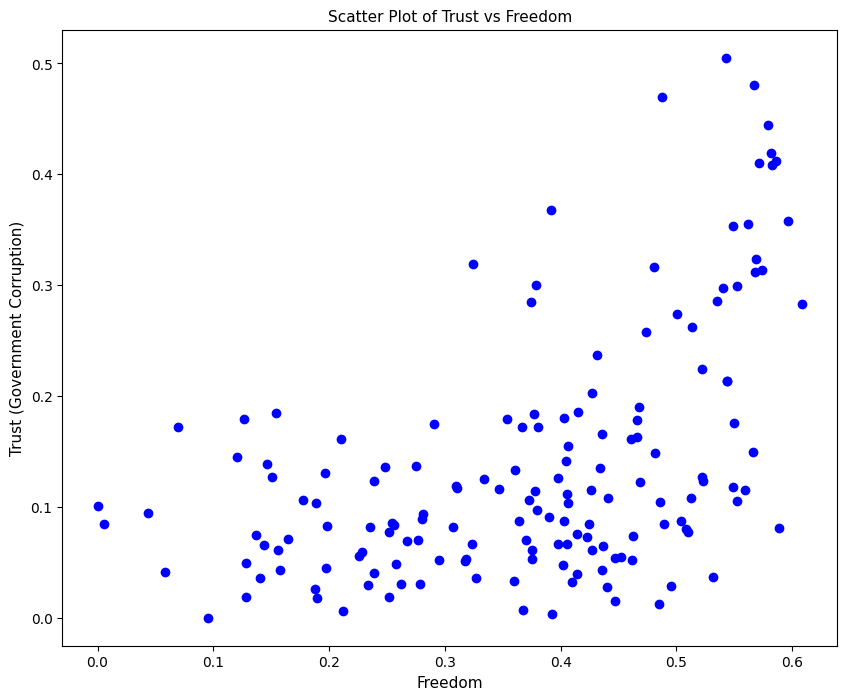

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(freedom, trust, color = 'blue', alpha = 1)

plt.xlabel('Freedom', fontsize = 11)
plt.ylabel('Trust (Government Corruption)', fontsize = 11)
plt.title('Scatter Plot of Trust vs Freedom', fontsize = 11)

plt.show()

In [ ]:
correlation = freedom.corr(trust)
print("Correlation between Trust and Freedom: ", correlation)

Correlation between Trust and Freedom:  0.5020539736587192


From the scatterplot and correlation value above, we can see that there aren't outliers in the dataset. Secondly, Freedom and Trust (Government Corruption) are directly related, however there isn't a strong correlation. Intuitively this makes sense because a population's sense of freedom or sense of freedom does not necessarily relate to their trust that their country's governement wants what's best for them. Similarly, some people may trust government's who afford them less freedom because that's all they have ever known. Therefore, a country's higher sense of trust does not always equate to more freedom and vice-versa.

In [ ]:
# Compute average happiness score by region
avg_happiness_score_by_region = df.groupby('Region')['Happiness Score'].mean()
avg_happiness_score_by_region = avg_happiness_score_by_region.sort_values()

A bar plot was used for Objective 3 to categorize average Happiness Scores by geographical region. The bar plot provides a clear side-by-side comparison between each region and allows us to make educated inferences about the happiness of a country's people solely based on their geographical location.

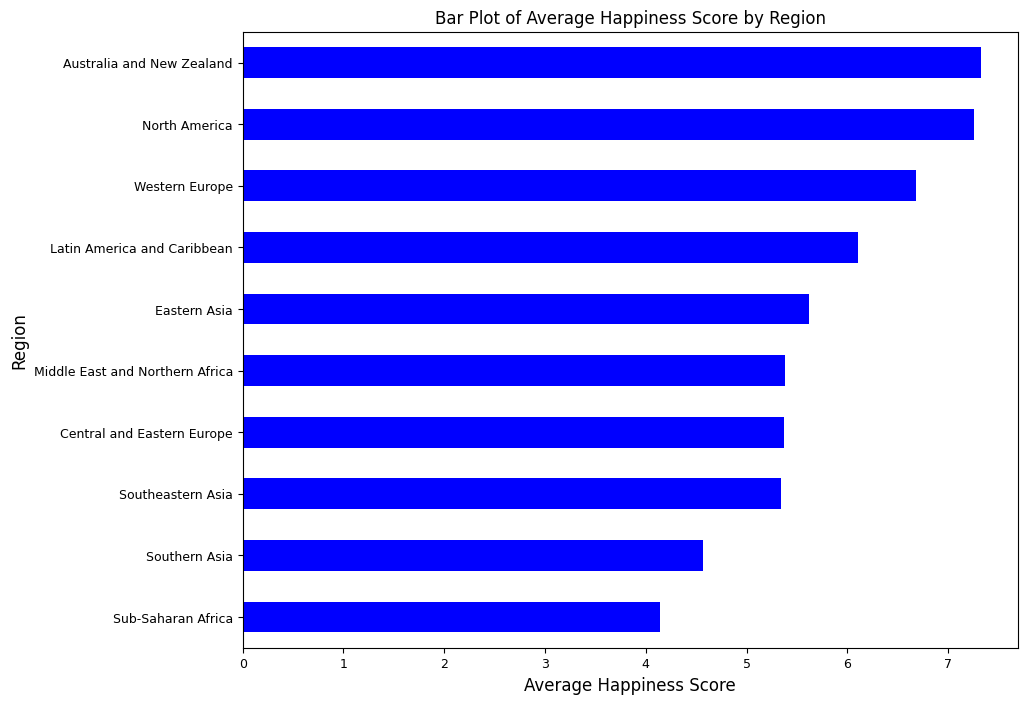

In [ ]:
plt.figure(figsize=(10,8))
avg_happiness_score_by_region.plot(kind = 'barh', color = 'blue', fontsize = 9)

plt.ylabel('Region', fontsize = 12)
plt.xlabel('Average Happiness Score', fontsize = 12)
plt.title('Bar Plot of Average Happiness Score by Region', fontsize = 12)

plt.show()

From the bar plot above, we can clearly see that countries in "Western" regions tend to have higher Happiness Scores. This is proven as the 3 regions of "Australia and New Zealand", "North America", and "Western Europe" standout as having the highest Average Happiness Scores of around 7. The main excpetion to this trend is the lower Average Happiness Score of "Central and Eastern Europe" at around 5, which can most likely be attributed to being poorer and poorer governments and a lower sense of societal freedom. This observed trend further proves to the point of the scatterplot above, that wealthier and more prosperous countries generally have happier people. Of course, this isn't always the case as there are countries that are excpetions to this rule and correlation in any of the 3 plots above does not equate to causation, but rather association of different features.

# Ethics

A major ethical concern is the method used to obtain this dataset. It can be very difficult to quantify many of these variables (freedom, health, happiness, etc.) on an ambiguous numerical scale that may be interpreted differently by individual respondents. Much of what is being measured in this dataset is subjective and there is no standard metric to follow. Additionally,people from different regions and living under certain governments may feel pressured to respond a certain way to these questions if they aren't guaranteed to stay anonymous. The standards/expectations for 'freedom' are entirely different from country to country, especially in places where foreign media that exposes different ways of life and thinking is censored.